## Feature Engineering - Dealing with Outliers

În cadrul acestui tutorial o să aruncăm o privire peste partea de dealing with outliers. În cadrul unui anumit set de date o să avem de a face cu anumite valori care nu se încadrează la un range normal de valori. Aceste valori poartă denumirea de outliers. Pentru cazul cu predicțiile pentru o anumită casă, un astfel de outlier poate să fie o casă care are o suprafață extrem de mare (mult mai mare decât media caselor din data set). De cele mai multe ori se recomandă se renunțe la aceste valori pentru a avea un model cât mai generalizat

În cadrul acestor noțiuni de outliers o să avem două categorii:

- Range and limits

- Percentage of Data

Aceste categorii prin care seteăm o anumită limită care să reprezinte valoarea maximă sau minimă admisă sau un procentaj de date depind foarte mult de domeniul în care se creează acel model și de asemenea depinde de setul de care pe care îl avem la dispoziție. 

#### Range and Limits

Cum anume putem să zicem că o anumită valoare reprezintă limita de la care să se considere ca fiind outliers? Există mai multe metode matematice prin care putem să facem acest lucru:

- InterQuartile Range (aici ne putem imagina partea de boxplots din Seaborn)

- Standard Deviation

- Visualized or Domain Limit Value

### Percentage of data

De reținut faptul că dacă se utilizează o metodă prin care ni-i se spune faptul că un procentaj extrem de mare de date sunt considerate ca și outliers, atunci probabil metoda pe care am folosit-o nu este cea mai bună. Oartea de outliers o să fie doar de câteva procente din cadrul întregului set de date. De exemplul dacă avem un număr de 100 de elemente și zicem că un procent de 25% din ele subt considerate a fi outliers, atunci ceva nu s-a realizat bine, nu s-a folosit metoda care trebuie deoarece este un procentaj prea mare. Prin urmare partea de vizualizare este extremd e importantă pentru a decide care date sunt clasificate ca și outliers (în special se folosește scatterplots și boxplot)

În continuare o să lucrăm practic pe un set de date în Jupyter Notebook

In [8]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

O să creem o funcție care ne generează o distribuție random a unor date care reprezintă vârsta unor persoane

In [9]:
def create_ages(mu=50, sigma=13, num_samples=100, seed=42):
    np.random.seed(seed)

    sample_ages = np.random.normal(loc=mu, scale=sigma, size=num_samples)
    sample_ages = np.round(sample_ages, decimals=0)

    return sample_ages

In [10]:
sample = create_ages()

In [11]:
sample

array([56., 48., 58., 70., 47., 47., 71., 60., 44., 57., 44., 44., 53.,
       25., 28., 43., 37., 54., 38., 32., 69., 47., 51., 31., 43., 51.,
       35., 55., 42., 46., 42., 74., 50., 36., 61., 34., 53., 25., 33.,
       53., 60., 52., 48., 46., 31., 41., 44., 64., 54., 27., 54., 45.,
       41., 58., 63., 62., 39., 46., 54., 63., 44., 48., 36., 34., 61.,
       68., 49., 63., 55., 42., 55., 70., 50., 70., 16., 61., 51., 46.,
       51., 24., 47., 55., 69., 43., 39., 43., 62., 54., 43., 57., 51.,
       63., 41., 46., 45., 31., 54., 53., 50., 47.])

O primă metodă prin care am putea să ne dăm seama dacă există ceva outliers în cadrul acestui set de date este prin crearea unui grafic de distribuție (sns.dispolt())

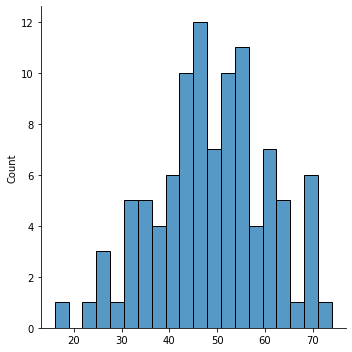

In [12]:
sns.displot(data=sample, bins=20)

Un prim lucru care se poate observa este faptul că nu există valori apropiate de 20, dar există sub 20. Acel bin care este gol ar putea fi un prim indicator al faptului că avem ceva outliers în cadrul acestui set de date. Mai putem să verificăm această teorie cu ajutorul unui boxplot

<AxesSubplot:>

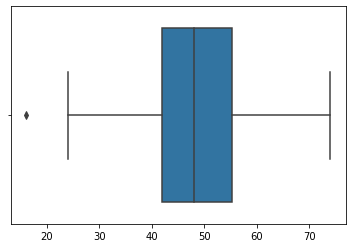

In [13]:
sns.boxplot(x=sample)

Din moment ce un boxplot folosește metoda de IQR (Inter Quartile Range) se poate observa că există anumite date care sunt considerate ca fiind outliers. În continuare o să transformăm acea variabilă într-un obiect de tip Series pentru a putea afla valorile de la procentajele de 25 și 75

In [14]:
sample_series = pd.Series(sample)

In [15]:
sample_series.describe()

count    100.00000
mean      48.66000
std       11.82039
min       16.00000
25%       42.00000
50%       48.00000
75%       55.25000
max       74.00000
dtype: float64

Din ceea ce este afișat mai sus putem să vedem că valoarea pentru procentajul de 25% este de 42, iar cea pentru 75% este 55.25. Dacă dorim să aflăm care este valoarea minimă de unde este considerat a fi un outliers atunci se poate folosi următoarea formulă:

Lower limit = 25% - 1.5 * IQR

IQR = 75% - 25%

In [16]:
IQR = 55.25 - 42

In [17]:
lower_limit = 42 - 1.5 * IQR

In [18]:
lower_limit

22.125

Acea valoare de la lower limit, 22.125, reprezintă valoarea minimă de la care datele sunt considerate ca fiind outliers. Ceea ce este mai mic de acea valoare sunt considerate date outlier, pe care teoretic ar trebui să le eliminăm din setul nostru de date. Dacă ne uităm la acel boxplot se paote observa că există o anumită valoare ce este mai mică decât 22, iar aceasta este considerată ca fiind outlier. Având acea limită putem acuma să filtrăm datele din series utilizând valoarea respectivă

In [19]:
sample_series[sample_series > lower_limit]

0     56.0
1     48.0
2     58.0
3     70.0
4     47.0
      ... 
95    31.0
96    54.0
97    53.0
98    50.0
99    47.0
Length: 99, dtype: float64

Din moment ce am filtrar acel obiect Series utilizând valoare de lower limit, în acest moment nu mai avem 100 de valori în acest Series, acuma sunt doar 99. Acest lucru se datorează faptului că eista o singură valoarea în cadrul acelui set de date care era mai mică decât valorea de lower_limit. Prin metoda de mai sus de fiecare dată trebuie să transformăm setul de date într-un obiect de tip Series și să apelăm meoda describe() pentru acest obiect ca să se returneze valorile pentru procentajul de 25 și 75. Numpy ne pune la dispoziție o metodă prin care se poate face același lucru, astfel nu mai suntem nevoiți să transformăm de fiecare dată un array într-un Series. Metoda respectivă poartă denumirea de 'percentile()', iar ca și argumente trebuie să îi oferim array-ul de unde pentru care dorim să realizăm această operațiuni împreună cu o listă de valori. Dacă îi oferim o listă de două valori, o să returneze de asemenea tot două valori

In [21]:
q25, q75 = np.percentile(sample, [25, 75])

In [22]:
q25

42.0

In [23]:
q75

55.25

Din ce se poate observa, datele care sunt returnate pentru procentajele de 25 și 75 sunt aceleași ca și valorile returnate de la metoda describe(), însă de această dată nu a mai trebuit să transformăm prima dată array-ul într-un Series, am rulat metoda np.percentile() pentru array-ul resepctiv. Aceasta este o metodă matematică prin calcul prin care se află dacă sunt anumiți outliers în cadrul unui set de date. O altă metodă de a verifica asta este prin partea de vizualizare. Pentru partea aceasta o să importăm un set de date nou cu care o să experimentăm.

In [24]:
df = pd.read_csv('../data/DATA/Ames_Housing_Data.csv')

In [26]:
df

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


În cadrul acestui DataFrame avem un număr de 2930 de rânduri și 81 de coloane. Din aceste coloane trebuie să ne stabilim care este label-ul pe care trebuie să îl prezicem, iar acesta este coloana de SalePrice. Primul pas pe care trebuie să îl facem este să vedem dacă există anumite valori în cadrul acelei coloane care ar putea să fie considerate ca și outliers.

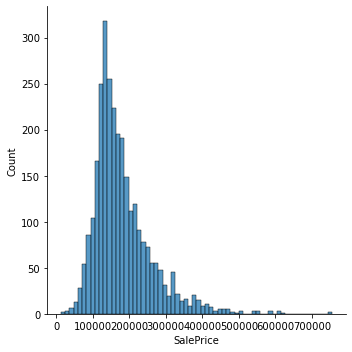

In [28]:
sns.displot(data=df, x='SalePrice')

Cu o primă metodă de vizualizare, cea de histogramă se poate observa că există anumite date care sunt prea la extremitatea acestui grafic (valori peste 700.000). Să încercăm să vizualizăm și cu ajutorul unui boxplot

<AxesSubplot:xlabel='SalePrice'>

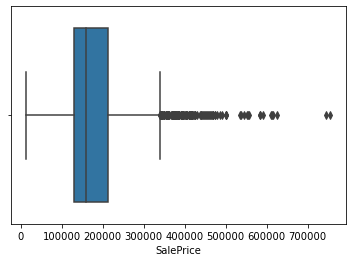

In [29]:
sns.boxplot(x='SalePrice', data=df)

Din moment ce există așa de multe valori care sunt considerate de către boxplot ca fiind outliers, această metodă nu este cea mai bună pentru a determina ce intră în categoria de outliers și ce nu. O altă metodă pe care o putem utiliza este să vedem care este corelația cea mai mare între SalePrice și coloanele numerice din cadrul acestui DataFrame

In [30]:
df.corr()

,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
PID,1.000000,-0.001281,-0.096918,0.034868,-0.263147,0.104451,-0.343388,-0.157111,-0.229283,-0.098375,...,-0.051135,-0.071311,0.162519,-0.024894,-0.025735,-0.002845,-0.008260,-0.050455,0.009579,-0.246521
MS SubClass,-0.001281,1.000000,-0.420135,-0.204613,0.039419,-0.067349,0.036579,0.043397,0.002730,-0.060075,...,-0.017310,-0.014823,-0.022866,-0.037956,-0.050614,-0.003434,-0.029254,0.000350,-0.017905,-0.085092
Lot Frontage,-0.096918,-0.420135,1.000000,0.491313,0.212042,-0.074448,0.121562,0.091712,0.222407,0.215583,...,0.120084,0.163040,0.012758,0.028564,0.076666,0.173947,0.044476,0.011085,-0.007547,0.357318
Lot Area,0.034868,-0.204613,0.491313,1.000000,0.097188,-0.034759,0.023258,0.021682,0.126830,0.191555,...,0.157212,0.103760,0.021868,0.016243,0.055044,0.093775,0.069188,0.003859,-0.023085,0.266549
Overall Qual,-0.263147,0.039419,0.212042,0.097188,1.000000,-0.094812,0.597027,0.569609,0.429418,0.284118,...,0.255663,0.298412,-0.140332,0.018240,0.041615,0.030399,0.005179,0.031103,-0.020719,0.799262
Overall Cond,0.104451,-0.067349,-0.074448,-0.034759,-0.094812,1.000000,-0.368773,0.047680,-0.135340,-0.050935,...,0.020344,-0.068934,0.071459,0.043852,0.044055,-0.016787,0.034056,-0.007295,0.031207,-0.101697
Year Built,-0.343388,0.036579,0.121562,0.023258,0.597027,-0.368773,1.000000,0.612095,0.313292,0.279870,...,0.228964,0.198365,-0.374364,0.015803,-0.041436,0.002213,-0.011011,0.014577,-0.013197,0.558426
Year Remod/Add,-0.157111,0.043397,0.091712,0.021682,0.569609,0.047680,0.612095,1.000000,0.196928,0.151790,...,0.217857,0.241748,-0.220383,0.037412,-0.046888,-0.011410,-0.003132,0.018048,0.032652,0.532974
Mas Vnr Area,-0.229283,0.002730,0.222407,0.126830,0.429418,-0.135340,0.313292,0.196928,1.000000,0.301872,...,0.165467,0.143748,-0.110787,0.013778,0.065643,0.004617,0.044934,-0.000276,-0.017715,0.508285
BsmtFin SF 1,-0.098375,-0.060075,0.215583,0.191555,0.284118,-0.050935,0.279870,0.151790,0.301872,1.000000,...,0.224010,0.124947,-0.100455,0.050541,0.095874,0.084140,0.092886,-0.001155,0.022397,0.432914


Ceea ce se returnează este un DataFrame de 38 de rânduri și 38 de coloane, care este destul de mare pentru a putea înțelege ceva de acolo. Putem să filtrăm acel DataFrame astfel încât să ni se afișeze corelația pentru coloana SalePrice și pentru restul coloanelor numerice din setul de date.

In [34]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice          1.000000
Overall Qual       0.799262
Gr Liv Area        0.706780
Garage Cars        0.647877
Garage Area        0.640401
Total Bsmt SF      0.632280
1st Flr SF         0.621676
Year Built         0.558426
Full Bath          0.545604
Year Remod/Add     0.532974
Garage Yr Blt      0.526965
Mas Vnr Area       0.508285
TotRms AbvGrd      0.495474
Fireplaces         0.474558
BsmtFin SF 1       0.432914
Lot Frontage       0.357318
Wood Deck SF       0.327143
Open Porch SF      0.312951
Half Bath          0.285056
Bsmt Full Bath     0.276050
2nd Flr SF         0.269373
Lot Area           0.266549
Bsmt Unf SF        0.182855
Bedroom AbvGr      0.143913
Screen Porch       0.112151
Pool Area          0.068403
Mo Sold            0.035259
3Ssn Porch         0.032225
BsmtFin SF 2       0.005891
Misc Val          -0.015691
Yr Sold           -0.030569
Bsmt Half Bath    -0.035835
Low Qual Fin SF   -0.037660
MS SubClass       -0.085092
Overall Cond      -0.101697
Kitchen AbvGr     -0

Cea mai mare corelație se pare că exită cu coloana 'Overall Qual'. Putem să ne uităm ce fel de date sunt prezente în cadrul acestei coloane și după să creem un scatterplot cu coloane de SalePrice și Overall Qual

In [35]:
df['Overall Qual'].value_counts()

5     825
6     732
7     602
8     350
4     226
9     107
3      40
10     31
2      13
1       4
Name: Overall Qual, dtype: int64

Valorile reprezintă un range între 1 și 10

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

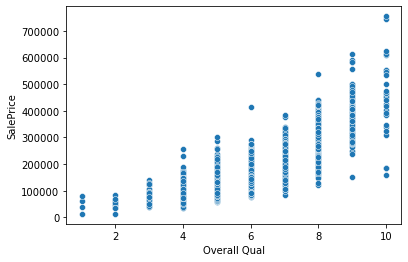

In [37]:
sns.scatterplot(x='Overall Qual', y='SalePrice', data=df)

Acest Scatterplot este destul de diferit față de un scatterplot normal, iar asta este din cauza faptului că sunt date de tip categorical în cadrul coloanei 'Overall Qual'. Din acest plot însă putem să ne dăm seama că ar exista anumite date care ar reprezenta ceva outliers pentru anumite valori din coloana 'Overall Qual'. De exemplu, la valoarea 6 se poate observa că există un anumit punct care este destul de depărtat de restul punctelor. De asemenea , la valoarea 10 se poate observa iar că avem anumite valori care nu sunt în aceeaș linie, și în extremitatea de sus (valorile peste 700.000 pe care le-am observat și din histogramă) și în extremitatea de jos (valori sub 200.000)

Pentru setul de date respectiv putem să mai creem un scatterplot și pentru alte features care au o corelație destul de mare cu label-ul de SalePrice. În continuare o să luăm cea de a doua coloană care are cea mai mare corelație cu SalePrice, și anume 'Gr Liv Area'

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

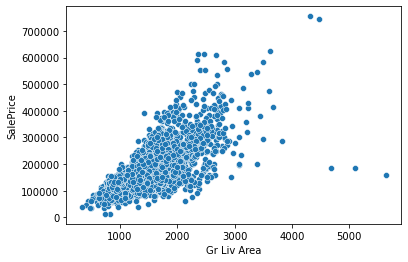

In [38]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

Din acest plot putem să vedem că există anumiți outliers care se pot identifica mult mai bine. Există acele 3 case care au un preț aproximativ de 200.000 care pentru features de 'Overall Qual' aveau valori de 9 sau 10 și acele două case care au preț mai mare de 700.000. Aici se poate observa cât de mult intră în calcul ideea de domain knowledge. Putem să căutăm în cadrul DataFrame-ului să vedem dacă există case care au un overall quality bun și un preț de vânzare mai mic de 200.000

In [39]:
df[(df['Overall Qual'] > 8) & (df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200_000)]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


Se poate observa faptul că există în cadrul setului de date anumite case care au un quality considerat bun, dar care s-au vândut la un preț mic. Din moment ce aceste 3 case reprezintă outliers pentru două features care au cea mai mare corelație cu label-ul de SalePrice putem considera că acestea reprezintă outliers pentru acest set de date. Putem să eliminăm aceste date din cadrul acestui DataFrame pentru a scăpa de acești outliers. Pentru a elimina datele respective o să extragem index-ul pe care se găsesc. Pentru a extrage index-ul trebuie ca după partea de filtrare să ne folosim de atributul .index care returnează un array de indexi pentru datele filtrate

In [42]:
df[(df['Overall Qual'] > 8) & (df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200_000)].index

Int64Index([1498, 2180, 2181], dtype='int64')

In [43]:
drop_index = df[(df['Overall Qual'] > 8) & (df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200_000)].index

Având acești indexi putem să îi ștergem din setul de date utilizând metoda .drop()

In [44]:
df = df.drop(drop_index, axis=0)

După ce am eliminat aceste valori să creem din nou acel scatterplot și să vedem cum arată acuma noul grafic

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

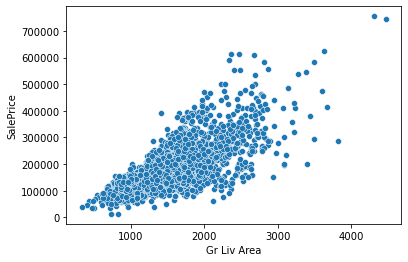

In [45]:
sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)

Graficul respectiv acuma arată mult mai bine în ceea ce privește crearea unei relații liniare. Datele de sus, cele două valori am decis să le lăsăm prezente în setul de date deoarece ar intra în acea linie de regresie care se creează. Există posibilitatea ca acele case să fie la un alt nivel de eleganșă, mărime, localizare și ar fi normal să fie prețul respectiv. Din nou, aceste decizii trebuie luate în funcție de cunoștințele din domeniu. La fel este și în cazul datelor pe care le-am șters. Există posibilitatea ca acele case să fi avut acel preț deoarece mai poate intra în calcul și perioada când au fost vândute. Poate sunt vândute după o anumită criză când toate prețurile au scăzut și atunci e normal să fie acel preț. Din nou, depinde de foarte mulți factori. 

Ce putem face cu acest set de date acuma este să îl salvăm ca să știm că până în acest moment ne-am ocupat de partea de dealing with outliers.

In [46]:
df.to_csv('../data/DATA/Ames_Housing_Data_outliers_removed.csv')

## Recapitulare

În cadrul acestei lecții am învățat cum să ne ocupăm de partea de outliers. Există mai multe metode, dintre acestea putem aminti:

    - utilizarea de range and limits cu percentile. Extragem valorile pentru procentajele de 25 și 75, calculăm IQR pe baza acestora după care putem calcula limita inferioară sau superioară. Cu valoarea de la aceste limite putem să filtrăm setul de date

    - prin partea de vizualizare. Aici intră partea de histogramă, corelația dintre labels și features pentru a vedea care dintre features are o importanță mai mare pentru a stabili valoarea pentru labels, vizualizarea prin scatterplots a unui feature cu o corelație mare și labels pentru a vedea dacă există anumiți outliers. Aceste proces se va face pentru mai multe mfeatures. După se filtrează setul de date cu valorile extrase din scatterplots de unde considerăm că ar putea fi reprezentative pentru outliers. Pentru partea aceasta trebuie să avem cunoștințe de domeniu.